In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv(r'C:\Users\Ray\Desktop\Customer Churn Data (1).csv')

df

,Unnamed: 0,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
0,0,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,160
1,1,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,121
2,3,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134
3,4,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,130
4,6,1,2,3.0,11.0,Cash on Delivery,Male,2.0,3,Super,2.0,Divorced,4,0.0,14,0,0,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8921,11255,0,10,1.0,34.0,Credit Card,Male,3.0,2,Super,1.0,Married,9,0.0,19,1,4,154
8922,11256,0,13,1.0,19.0,Credit Card,Male,3.0,5,HNI,5.0,Married,7,0.0,16,1,8,227
8923,11257,0,1,1.0,14.0,Debit Card,Male,3.0,2,Super,4.0,Married,7,1.0,22,1,4,191
8924,11258,0,23,3.0,11.0,Credit Card,Male,4.0,5,Super,4.0,Married,7,0.0,16,2,9,180


In [3]:
df.shape[0]

8926

In [4]:
df.shape[1]

18

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8926 entries, 0 to 8925
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               8926 non-null   int64  
 1   Churn                    8926 non-null   int64  
 2   Tenure                   8926 non-null   int64  
 3   City_Tier                8926 non-null   float64
 4   CC_Contacted_LY          8926 non-null   float64
 5   Payment                  8926 non-null   object 
 6   Gender                   8926 non-null   object 
 7   Service_Score            8926 non-null   float64
 8   Account_user_count       8926 non-null   object 
 9   account_segment          8926 non-null   object 
 10  CC_Agent_Score           8926 non-null   float64
 11  Marital_Status           8926 non-null   object 
 12  rev_per_month            8926 non-null   object 
 13  Complain_ly              8926 non-null   float64
 14  rev_growth_yoy          

In [6]:
df = df.replace('#', '0')
df = df.replace('F', 'Female')
df = df.replace('M', 'Male') 
df=df.replace('@', ' ')
df=df.replace('Regular +', 'Regular Plus')
df=df.replace('Super +', 'Super Plus')
df=df.replace('+', ' ')
df=df.replace('*', ' ')
df=df.replace('$', ' ')

df


,Unnamed: 0,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
0,0,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,160
1,1,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,121
2,3,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134
3,4,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,130
4,6,1,2,3.0,11.0,Cash on Delivery,Male,2.0,3,Super,2.0,Divorced,4,0.0,14,0,0,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8921,11255,0,10,1.0,34.0,Credit Card,Male,3.0,2,Super,1.0,Married,9,0.0,19,1,4,154
8922,11256,0,13,1.0,19.0,Credit Card,Male,3.0,5,HNI,5.0,Married,7,0.0,16,1,8,227
8923,11257,0,1,1.0,14.0,Debit Card,Male,3.0,2,Super,4.0,Married,7,1.0,22,1,4,191
8924,11258,0,23,3.0,11.0,Credit Card,Male,4.0,5,Super,4.0,Married,7,0.0,16,2,9,180


In [7]:
pd.isnull(pd.NA)
print(df.isnull().sum())

Unnamed: 0                 0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
dtype: int64


In [8]:
df.reset_index()

,index,Unnamed: 0,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
0,0,0,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,160
1,1,1,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,121
2,2,3,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134
3,3,4,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,130
4,4,6,1,2,3.0,11.0,Cash on Delivery,Male,2.0,3,Super,2.0,Divorced,4,0.0,14,0,0,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8921,8921,11255,0,10,1.0,34.0,Credit Card,Male,3.0,2,Super,1.0,Married,9,0.0,19,1,4,154
8922,8922,11256,0,13,1.0,19.0,Credit Card,Male,3.0,5,HNI,5.0,Married,7,0.0,16,1,8,227
8923,8923,11257,0,1,1.0,14.0,Debit Card,Male,3.0,2,Super,4.0,Married,7,1.0,22,1,4,191
8924,8924,11258,0,23,3.0,11.0,Credit Card,Male,4.0,5,Super,4.0,Married,7,0.0,16,2,9,180


In [9]:
df.dropna(how='all')
df.dropna(inplace=True)
df

,Unnamed: 0,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
0,0,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,160
1,1,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,121
2,3,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134
3,4,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,130
4,6,1,2,3.0,11.0,Cash on Delivery,Male,2.0,3,Super,2.0,Divorced,4,0.0,14,0,0,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8921,11255,0,10,1.0,34.0,Credit Card,Male,3.0,2,Super,1.0,Married,9,0.0,19,1,4,154
8922,11256,0,13,1.0,19.0,Credit Card,Male,3.0,5,HNI,5.0,Married,7,0.0,16,1,8,227
8923,11257,0,1,1.0,14.0,Debit Card,Male,3.0,2,Super,4.0,Married,7,1.0,22,1,4,191
8924,11258,0,23,3.0,11.0,Credit Card,Male,4.0,5,Super,4.0,Married,7,0.0,16,2,9,180


In [10]:
df.reset_index(drop=True)

,Unnamed: 0,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
0,0,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,160
1,1,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,121
2,3,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134
3,4,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,130
4,6,1,2,3.0,11.0,Cash on Delivery,Male,2.0,3,Super,2.0,Divorced,4,0.0,14,0,0,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8921,11255,0,10,1.0,34.0,Credit Card,Male,3.0,2,Super,1.0,Married,9,0.0,19,1,4,154
8922,11256,0,13,1.0,19.0,Credit Card,Male,3.0,5,HNI,5.0,Married,7,0.0,16,1,8,227
8923,11257,0,1,1.0,14.0,Debit Card,Male,3.0,2,Super,4.0,Married,7,1.0,22,1,4,191
8924,11258,0,23,3.0,11.0,Credit Card,Male,4.0,5,Super,4.0,Married,7,0.0,16,2,9,180


In [11]:
df1=df.head()
df1

,Unnamed: 0,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
0,0,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,160
1,1,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,121
2,3,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134
3,4,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,130
4,6,1,2,3.0,11.0,Cash on Delivery,Male,2.0,3,Super,2.0,Divorced,4,0.0,14,0,0,121


In [12]:
df2=df.tail()
df2

,Unnamed: 0,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
8921,11255,0,10,1.0,34.0,Credit Card,Male,3.0,2,Super,1.0,Married,9,0.0,19,1,4,154
8922,11256,0,13,1.0,19.0,Credit Card,Male,3.0,5,HNI,5.0,Married,7,0.0,16,1,8,227
8923,11257,0,1,1.0,14.0,Debit Card,Male,3.0,2,Super,4.0,Married,7,1.0,22,1,4,191
8924,11258,0,23,3.0,11.0,Credit Card,Male,4.0,5,Super,4.0,Married,7,0.0,16,2,9,180
8925,11259,0,8,1.0,22.0,Credit Card,Male,3.0,2,Super,3.0,Married,5,0.0,13,2,3,175


In [13]:
df.to_csv(r'C:\Users\Ray\Desktop\Customer Churn Data 2.csv')

In [14]:
df.shape[0]


8926

In [15]:
df.shape[1]

18

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,8926.0,5636.558369,3257.643247,0.0,2794.25,5658.5,8462.75,11259.0
Churn,8926.0,0.166928,0.372933,0.0,0.00,0.0,0.00,1.0
Tenure,8926.0,11.197849,13.705468,0.0,2.00,9.0,16.00,99.0
City_Tier,8926.0,1.653820,0.915616,1.0,1.00,1.0,3.00,3.0
CC_Contacted_LY,8926.0,17.881246,8.903177,4.0,11.00,16.0,23.00,132.0
Service_Score,8926.0,2.904324,0.726011,0.0,2.00,3.0,3.00,5.0
CC_Agent_Score,8926.0,3.058257,1.383444,1.0,2.00,3.0,4.00,5.0
Complain_ly,8926.0,0.282657,0.450316,0.0,0.00,0.0,1.00,1.0


In [17]:
df.describe(include='object').T

,count,unique,top,freq
Payment,8926,5,Debit Card,3694
Gender,8926,2,Male,5387
Account_user_count,8926,7,4,3594
account_segment,8926,5,Regular Plus,3316
Marital_Status,8926,3,Married,4744
rev_per_month,8926,59,3,1424
rev_growth_yoy,8926,20,14,1204
coupon_used_for_payment,8926,18,1,3481
Day_Since_CC_connect,8926,24,3,1480
cashback,8926,233,153,180


In [18]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit([[1, 2], [np.nan, 3], [7, 6]])

X = [[np.nan, 2], [6, np.nan], [7, 6]]
print(imp.transform(X))

[[4.         2.        ]
 [6.         3.66666667]
 [7.         6.        ]]


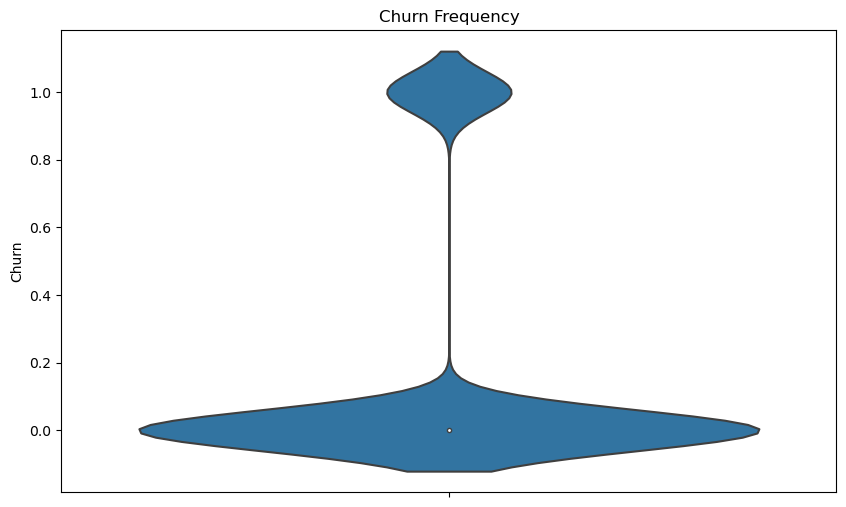

In [19]:
plt.figure(figsize=(10,6))
plt.title("Churn Frequency")
sns.axes_style("dark")
sns.violinplot(y=df["Churn"])
plt.show()

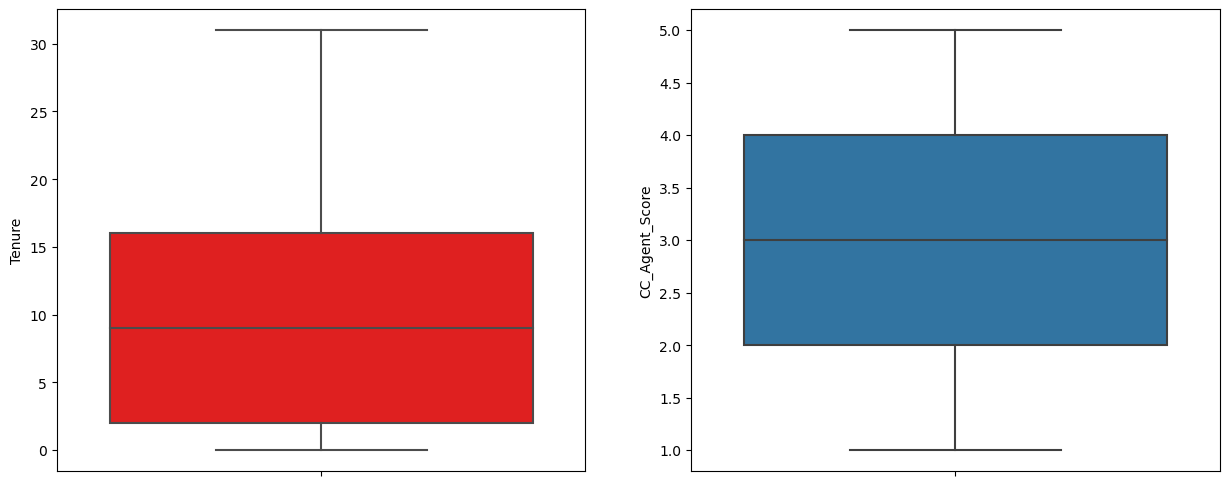

In [20]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Tenure"], color="red", sym='')
plt.subplot(1,2,2)
sns.boxplot(y=df["CC_Agent_Score"],sym='')
plt.show()

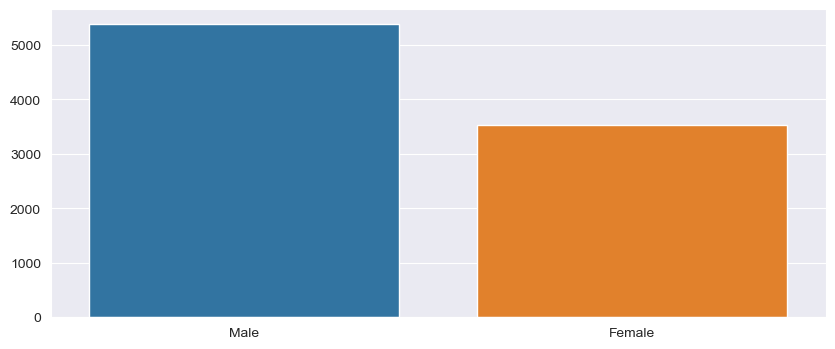

In [21]:
genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

In [22]:
print( "Input DataFrame is:\n"), df
numerics = ['float64', 'int64']
df = df.select_dtypes(include=numerics)
print ("Numeric column in input DataFrame is:\n"), df

Input DataFrame is:

Numeric column in input DataFrame is:



(None,
       Unnamed: 0  Churn  Tenure  City_Tier  CC_Contacted_LY  Service_Score  \
 0              0      1       4        3.0              6.0            3.0   
 1              1      1       0        1.0              8.0            3.0   
 2              3      1       0        3.0             15.0            2.0   
 3              4      1       0        1.0             12.0            2.0   
 4              6      1       2        3.0             11.0            2.0   
 ...          ...    ...     ...        ...              ...            ...   
 8921       11255      0      10        1.0             34.0            3.0   
 8922       11256      0      13        1.0             19.0            3.0   
 8923       11257      0       1        1.0             14.0            3.0   
 8924       11258      0      23        3.0             11.0            4.0   
 8925       11259      0       8        1.0             22.0            3.0   
 
       CC_Agent_Score  Complain_ly  
 0    

C:\Users\Ray\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ray\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ray\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ray\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ray\anaconda3\lib\site-packages\sklearn\cluster\_kmeans

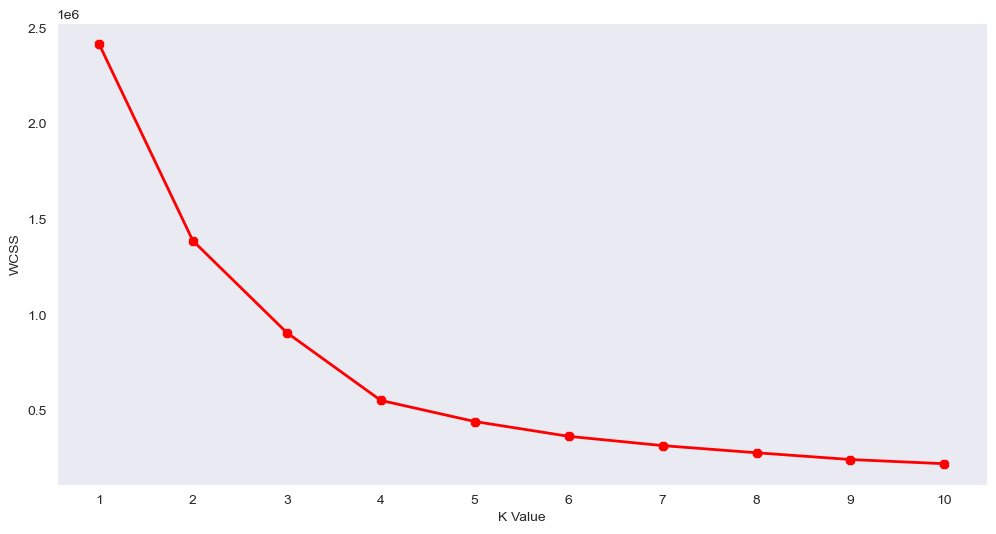

In [23]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [36]:
model = KMeans(n_clusters=3)
model.fit(df)

C:\Users\Ray\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [25]:
labels = model.predict(df)
print(labels)


[2 2 2 ... 1 1 1]


C:\Users\Ray\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


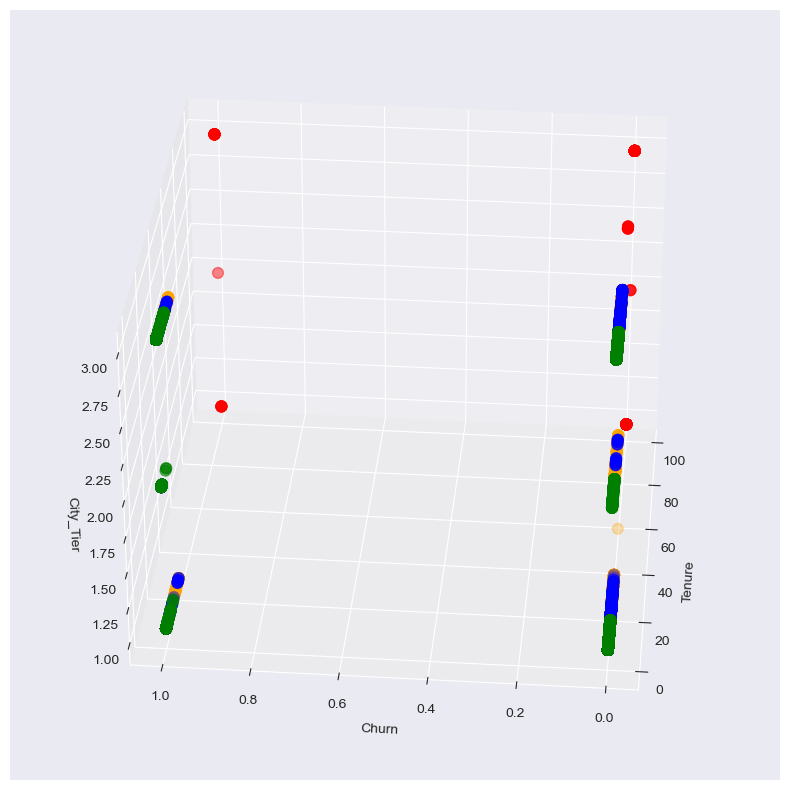

In [41]:
km = KMeans(n_clusters=4)
clusters = km.fit_predict(df.iloc[:,1:])
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Tenure[df.label == 0], df["Churn"][df.label == 0], df["City_Tier"][df.label == 0], c='blue', s=60)
ax.scatter(df.Tenure[df.label == 1], df["Churn"][df.label == 1], df["City_Tier"][df.label == 1], c='red', s=60)
ax.scatter(df.Tenure[df.label == 2], df["Churn"][df.label == 2], df["City_Tier"][df.label == 2], c='green', s=60)
ax.scatter(df.Tenure[df.label == 3], df["Churn"][df.label == 3], df["City_Tier"][df.label == 3], c='orange', s=60)
ax.view_init(30, 185)
plt.xlabel("Tenure")
plt.ylabel("Churn")
ax.set_zlabel("City_Tier")
plt.show()

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
kmeans = KMeans(n_clusters=4)
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(df)


C:\Users\Ray\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=4))])

C:\Users\Ray\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


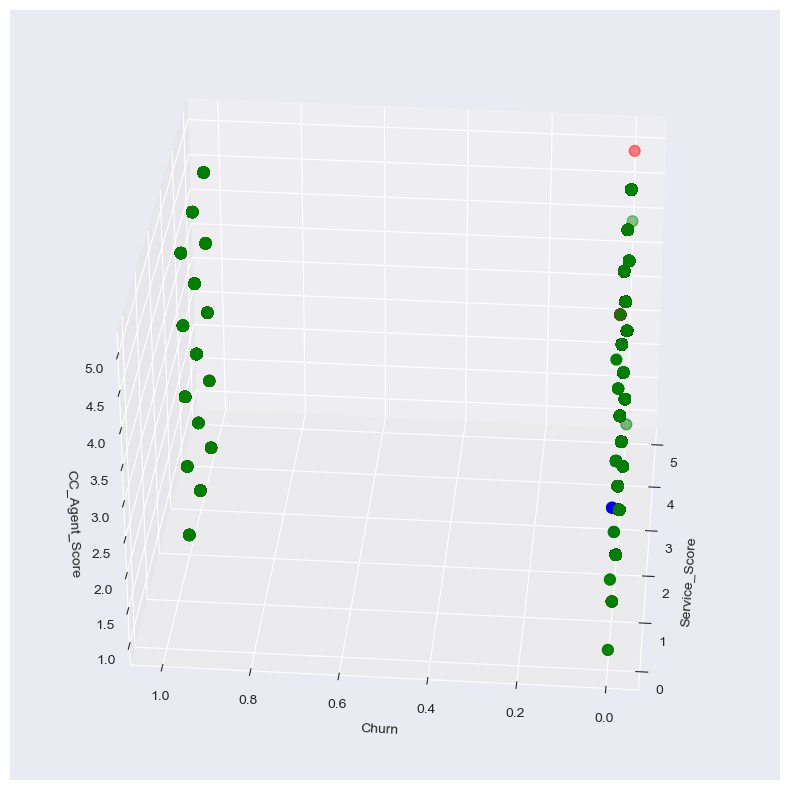

In [49]:
km = KMeans(n_clusters=4)
clusters = km.fit_predict(df.iloc[:,1:])
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Service_Score [df.label == 0], df["Churn"][df.label == 0], df["CC_Agent_Score"][df.label == 0], c='blue', s=60)
ax.scatter(df.Service_Score [df.label == 1], df["Churn"][df.label == 1], df["CC_Agent_Score"][df.label == 1], c='red', s=60)
ax.scatter(df.Service_Score [df.label == 2], df["Churn"][df.label == 2], df["CC_Agent_Score"][df.label == 2], c='green', s=60)
ax.scatter(df.Service_Score [df.label == 3], df["Churn"][df.label == 3], df["CC_Agent_Score"][df.label == 3], c='orange', s=60)
ax.view_init(30, 185)
plt.xlabel("Service_Score")
plt.ylabel("Churn")
ax.set_zlabel("CC_Agent_Score")
plt.show()

C:\Users\Ray\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


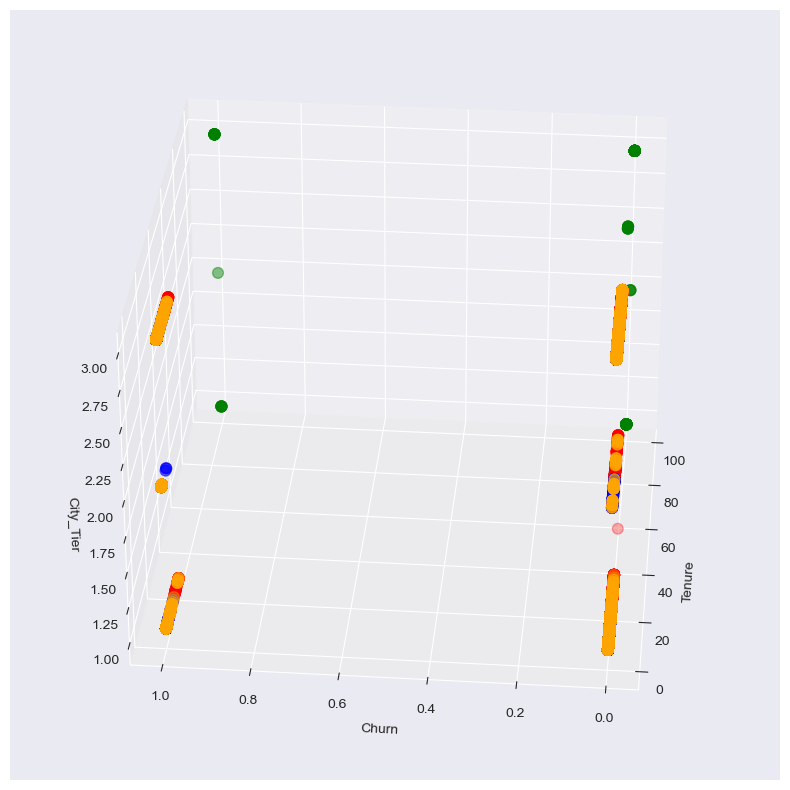

In [50]:
km = KMeans(n_clusters=4)
clusters = km.fit_predict(df.iloc[:,1:])
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Tenure[df.label == 0], df["Churn"][df.label == 0], df["City_Tier"][df.label == 0], c='blue', s=60)
ax.scatter(df.Tenure[df.label == 1], df["Churn"][df.label == 1], df["City_Tier"][df.label == 1], c='red', s=60)
ax.scatter(df.Tenure[df.label == 2], df["Churn"][df.label == 2], df["City_Tier"][df.label == 2], c='green', s=60)
ax.scatter(df.Tenure[df.label == 3], df["Churn"][df.label == 3], df["City_Tier"][df.label == 3], c='orange', s=60)
ax.view_init(30, 185)
plt.xlabel("Tenure")
plt.ylabel("Churn")
ax.set_zlabel("City_Tier")
plt.show()